In [30]:
# importing

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_ind


In [31]:
#Reading our both datasets

df1=pd.read_csv("/content/dataset1_cleaned.csv")
df2=pd.read_csv('/content/dataset2_cleaned.csv')

In [32]:
#dataset exploration
df1.head()

,start_time,bat_landing_to_food,habit,rat_period_start,rat_period_end,seconds_after_rat_arrival,risk,reward,month,sunset_time,hours_after_sunset,season
0,27/01/2018 23:44,0.04941,fast,27/01/2018 23:44,27/01/2018 23:50,12,0,1,1,27/01/2018 17:09,6.591111,0
1,27/01/2018 23:44,1.00000,fast,27/01/2018 23:44,27/01/2018 23:50,14,0,1,1,27/01/2018 17:09,6.591667,0
2,27/01/2018 23:45,6.00000,rat,27/01/2018 23:44,27/01/2018 23:50,49,1,0,1,27/01/2018 17:09,6.601389,0
3,27/01/2018 23:45,3.00000,fast,27/01/2018 23:44,27/01/2018 23:50,68,0,1,1,27/01/2018 17:09,6.606667,0
4,27/01/2018 23:45,8.00000,rat,27/01/2018 23:44,27/01/2018 23:50,84,1,0,1,27/01/2018 17:09,6.611111,0


In [33]:
df2.head()

,time,month,hours_after_sunset,bat_landing_number,food_availability,rat_minutes,rat_arrival_number
0,26/12/2017 16:13,0,-0.5,20,4.000000,0.0,0
1,26/12/2017 16:43,0,0.0,28,4.000000,0.0,0
2,26/12/2017 17:13,0,0.5,25,4.000000,0.0,0
3,26/12/2017 17:43,0,1.0,71,4.000000,0.0,0
4,26/12/2017 18:13,0,1.5,44,3.753857,0.0,0


**Descriptive Analysis**

Vigilance:

So, we have a variable "bat_landing_to_food" which describes the time difference after a bat lands and before it appraches the food
We will analyse this to find out about the vigilance by bat.


In [34]:
vigilance_mean=df1['bat_landing_to_food'].mean()            #Calculating mean
vigilance_median=df1['bat_landing_to_food'].median()        #Calculating median
print(f'vigilance_mean: {vigilance_mean:.1f}')
print(f'vigilance_median: {vigilance_median:.1f}')

vigilance_mean: 8.8
vigilance_median: 4.0


/tmp/ipython-input-2327861167.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


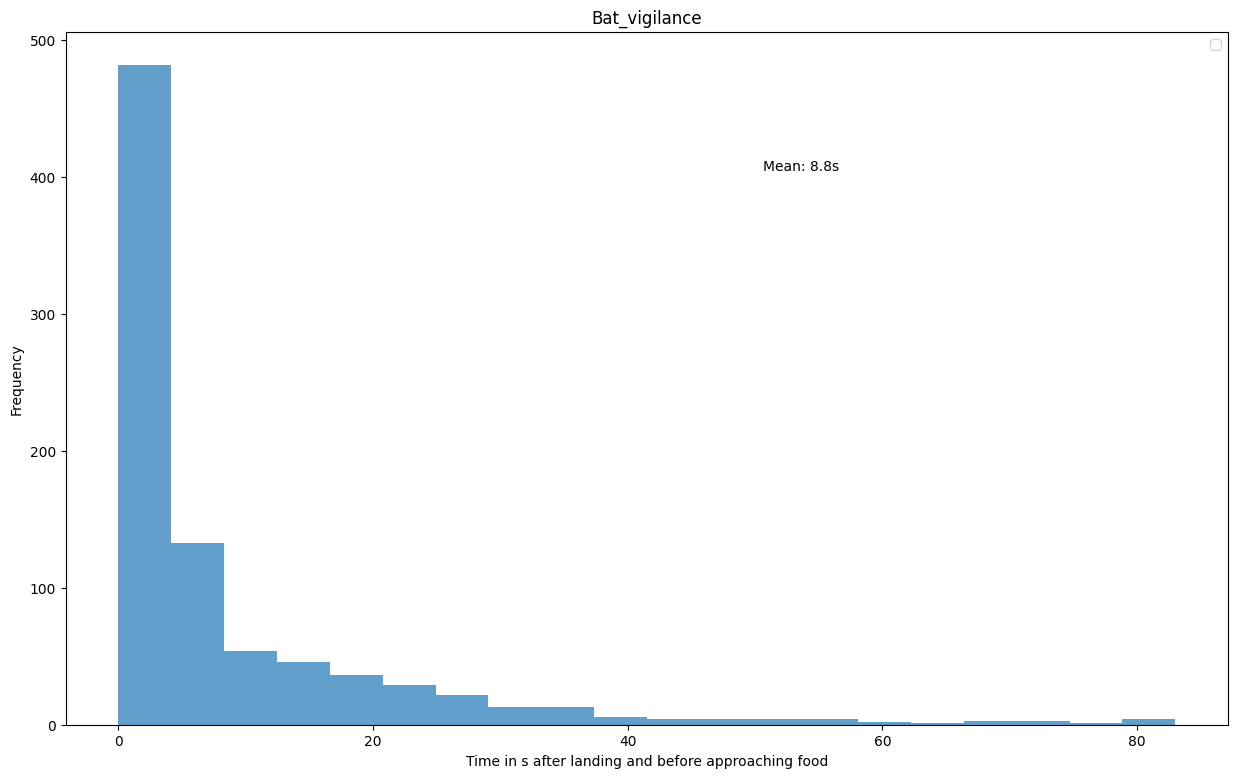

In [35]:
#visualizing
plt.figure(figsize=(15,9))
plt.hist(df1['bat_landing_to_food'],bins=20,alpha=0.7)
plt.title('Bat_vigilance')
plt.xlabel('Time in s after landing and before approaching food')
plt.ylabel('Frequency')
plt.text(0.6,0.8, f'Mean: {vigilance_mean:.1f}s', transform=plt.gca().transAxes)
plt.legend()
plt.show()

So, from the above plot, it is clear that on average, bats take 8.8sec to approach food after landing. This is a significant waiting time. This shows that bats view rats as predators,
because if they didnt, they would rush to get the food after landing.

Now, we will take a look at the risk column in dataset 1.
We have,
0- risk avoidance by bats
1- risk taken by bats
We will compare both percentages to see if bats avoid risk or take more risk.

If avoidance % is high, then bats see rats as predators.
If risk taken % is high, they generally dont see rats as predators.


In [36]:
risk=df1['risk'].value_counts(normalize=True)       #calculating how many incidents of risk avoidance (0) and risk taken (1) are there. normalizing them
risk_avoid_percentage=risk[0]*100                     #calculating % so visulaizing is easier
risk_taken_percentage=risk[1]*100

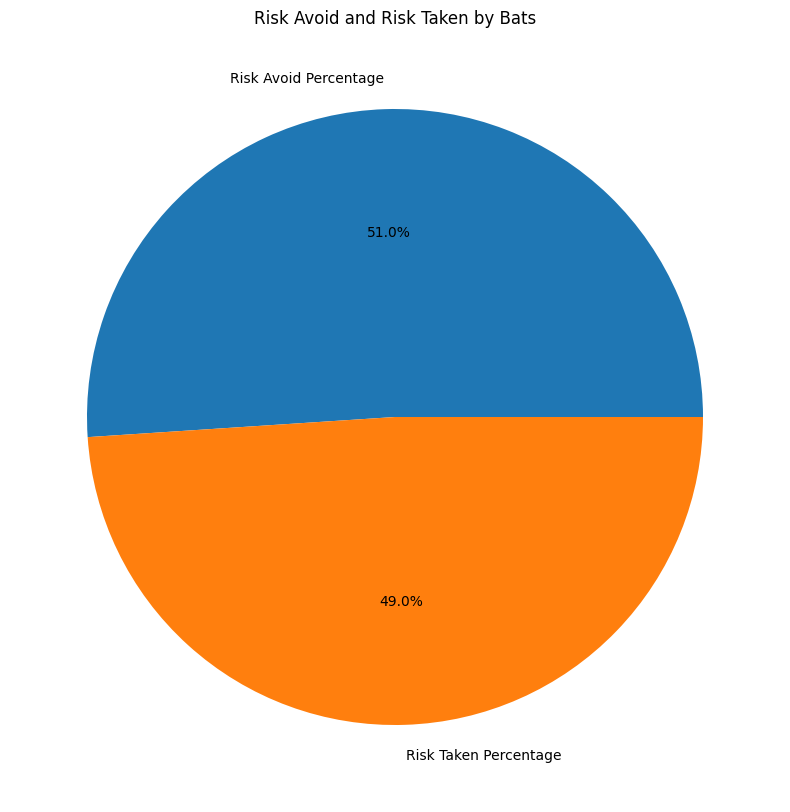

In [37]:
#Plotting a pie chart for visualizing the two categories
plt.figure(figsize=(10,10))
labels=['Risk Avoid Percentage', 'Risk Taken Percentage']
sizes=[risk_avoid_percentage,risk_taken_percentage]
plt.pie(sizes, labels=labels,autopct='%1.1f%%')
plt.title("Risk Avoid and Risk Taken by Bats")
plt.show()

We can see from above, risk avoidance is higher. so bats definitely see rats as predators because they dont want to take risk vs rats while getting food.


Now we will see timing of bats when rats arrive.

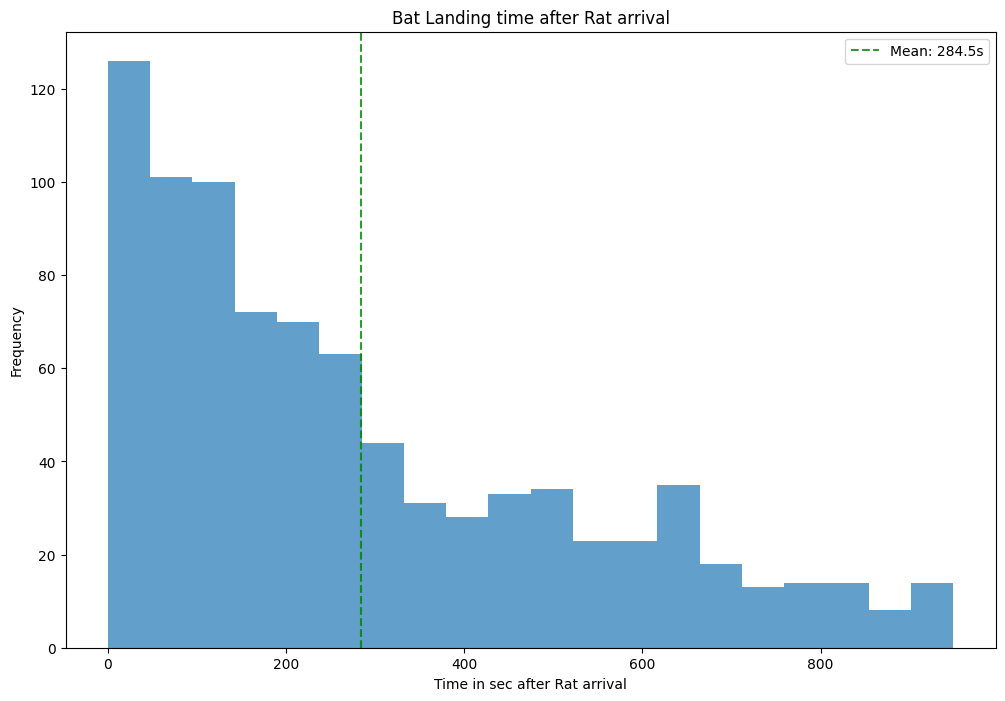

In [38]:
time_mean=df1['seconds_after_rat_arrival'].mean()
plt.figure(figsize=(12,8))
plt.hist(df1['seconds_after_rat_arrival'],bins=20,alpha=0.7)
plt.axvline(time_mean, color="green", linestyle="dashed", alpha=0.8, label=f"Mean: {time_mean:.1f}s")
plt.title('Bat Landing time after Rat arrival')
plt.xlabel('Time in sec after Rat arrival')
plt.ylabel('Frequency')
plt.legend()
plt.show()

From above, we can see the average time for bat to land after arrival of rat is 284.5s which is a lot. This shows bats consider rats as predators.

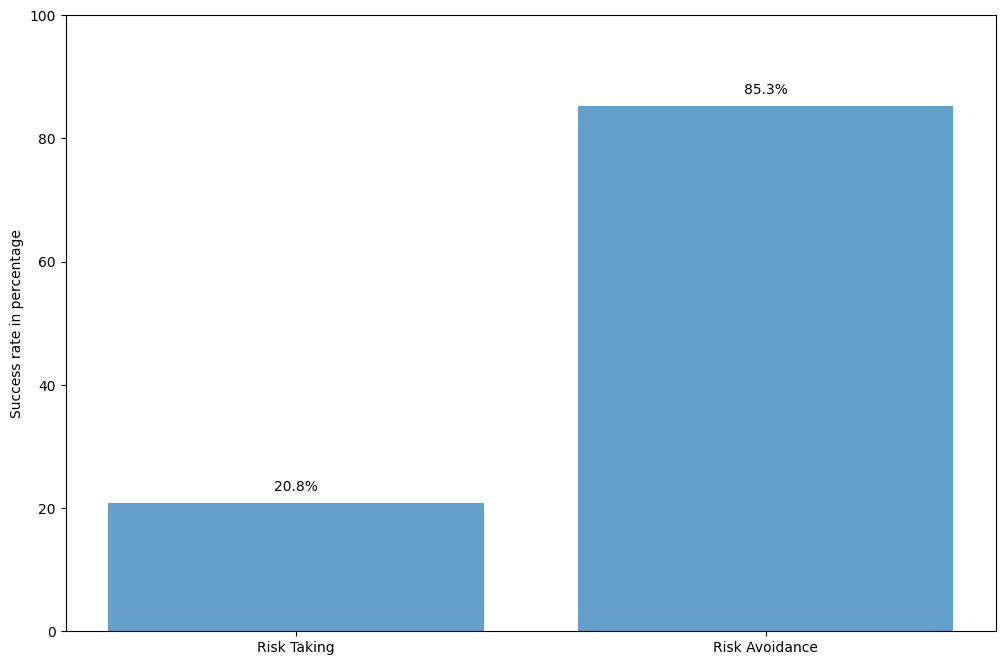

In [39]:
'''
we have, 0--risk avoiding bats
         1--risk taking bats
'''

#For risk avoiding bats,

success_avoiding=df1[df1['risk']==0]['reward'].mean()

#for risk taking bats,
success_taking=df1[df1['risk']==1]['reward'].mean()

#calculate percentages
success_avoiding_percentage=success_avoiding *100
success_taking_percentage=success_taking *100

#Visualizing

plt.figure(figsize=(12,8))
behavior=['Risk Taking', 'Risk Avoidance']
success_rates=[success_taking_percentage, success_avoiding_percentage]
plt.bar(behavior, success_rates,alpha=0.7)
plt.title('')
plt.ylabel('Success rate in percentage')
plt.ylim(0,100)

for i, rate in enumerate(success_rates):
  plt.text(i,rate+2, f'{rate:.1f}%', ha='center')

plt.show()

From dataset2, lets look at rat_arrival_number and bat_landing_number

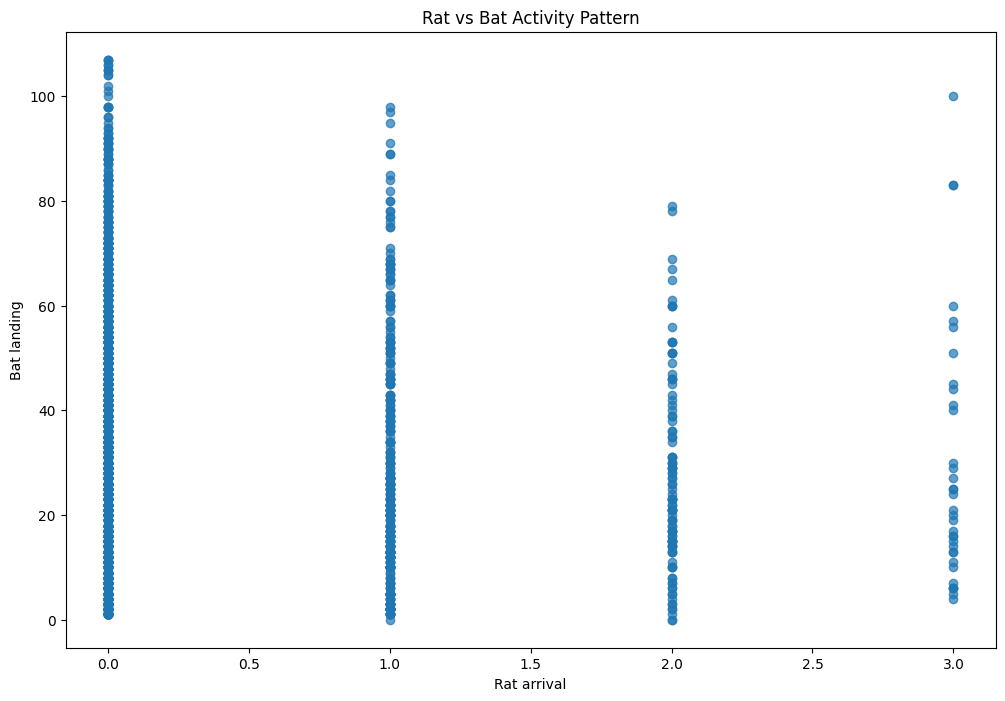

In [40]:
plt.figure(figsize=(12,8))
plt.scatter(df2['rat_arrival_number'],df2['bat_landing_number'], alpha=0.7)
plt.title('Rat vs Bat Activity Pattern')
plt.xlabel('Rat arrival')
plt.ylabel('Bat landing')

plt.show()

This clearly suggests that within a 30 min period, when there are no rat arrival, the number of bat landing is highest. The bat landings decrease significantly when there are 2 or more rat arrivals.

**Inferential Analysis**

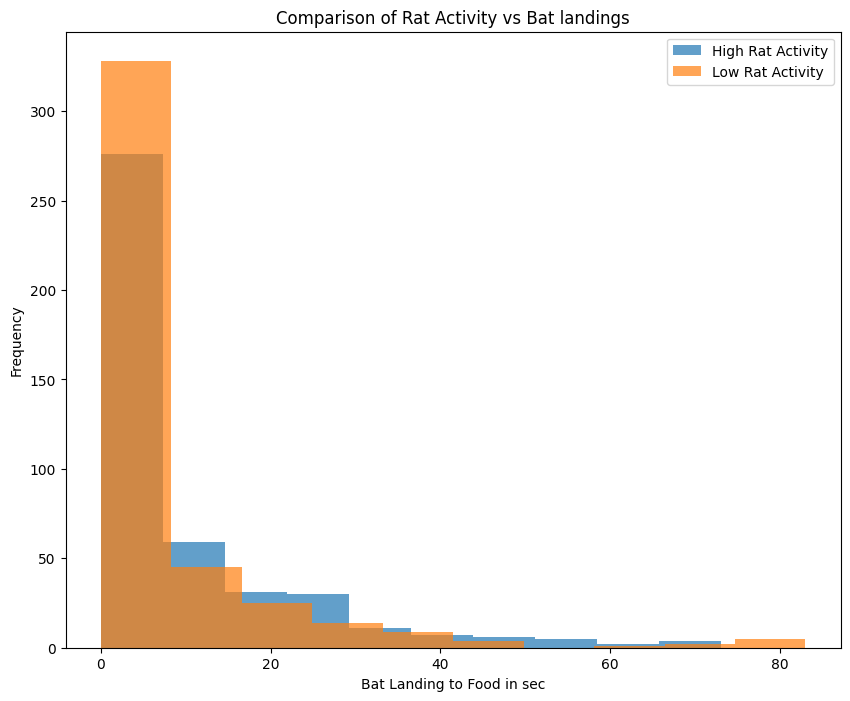

p value: 0.03562624762757811


In [41]:
#t-test on bat_landing_to_food (vigilance)
#Lets create two groups from dataset1 "seconds_after_rat_arrival"
#1- High rat activity
#2-Low rat activity

median_seconds=df1['seconds_after_rat_arrival'].median()
high_rat_activity=df1[df1['seconds_after_rat_arrival']> median_seconds]['bat_landing_to_food']      #high rat activity- bat lands soon after rat arrives (high risk)
low_rat_activity=df1[df1['seconds_after_rat_arrival']<= median_seconds]['bat_landing_to_food']      #low- bat lands after some time (low risk)

t_stat, p_value=ttest_ind(high_rat_activity,low_rat_activity)           #Calculating t-stat and p-value

plt.figure(figsize=(10,8))
plt.hist(high_rat_activity, alpha=0.7, label="High Rat Activity")
plt.hist(low_rat_activity, alpha=0.7,label="Low Rat Activity")
plt.xlabel("Bat Landing to Food in sec")
plt.ylabel('Frequency')
plt.title('Comparison of Rat Activity vs Bat landings')
plt.legend()
plt.show()

print("p value:", p_value)

Here, we can see that bat are landing faster on low rat activity. But when the rat activity is high, they are waiting longer to land.


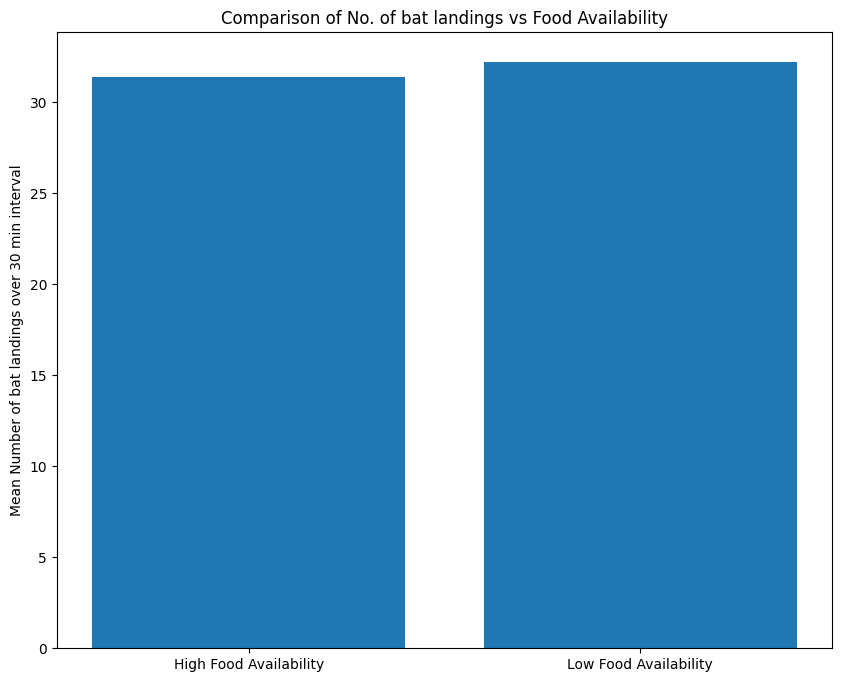

High Food CI : 29.99886802057555 32.74696122378166
Low Food CI : 30.639248569561637 33.82741809710503


In [42]:
# Now, lets use the food_availability feature on dataset 2 and compare bat landing number on food with confidence intervals


median_food_availabilty=df2['food_availability'].median()
higher_food_availability = df2[df2['food_availability'] > median_food_availabilty]['bat_landing_number']
lower_food_availability = df2[df2['food_availability'] <= median_food_availabilty]['bat_landing_number']

mean_high_food=np.mean(higher_food_availability)    #calculating mean
mean_low_food=np.mean(lower_food_availability)

#calculating confidence interval on 95%
ci_high_food = stats.t.interval(0.95, len(higher_food_availability)-1, loc=mean_high_food, scale=stats.sem(higher_food_availability))
ci_low_food = stats.t.interval(0.95, len(lower_food_availability)-1, loc=mean_low_food, scale=stats.sem(lower_food_availability))

plt.figure(figsize=(10,8))
plt.bar(['High Food Availability','Low Food Availability'],[mean_high_food,mean_low_food])
plt.ylabel('Mean Number of bat landings over 30 min interval')
plt.title('Comparison of No. of bat landings vs Food Availability')
plt.show()

print("High Food CI :", float(ci_high_food[0]),float(ci_high_food[1]))
print("Low Food CI :", float(ci_low_food[0]),float(ci_low_food[1]))

Here, the CIs overlap. So this shows that the food availability doesnt affect number of bat landings much. So, it is likely bats prefer safety over getting food.

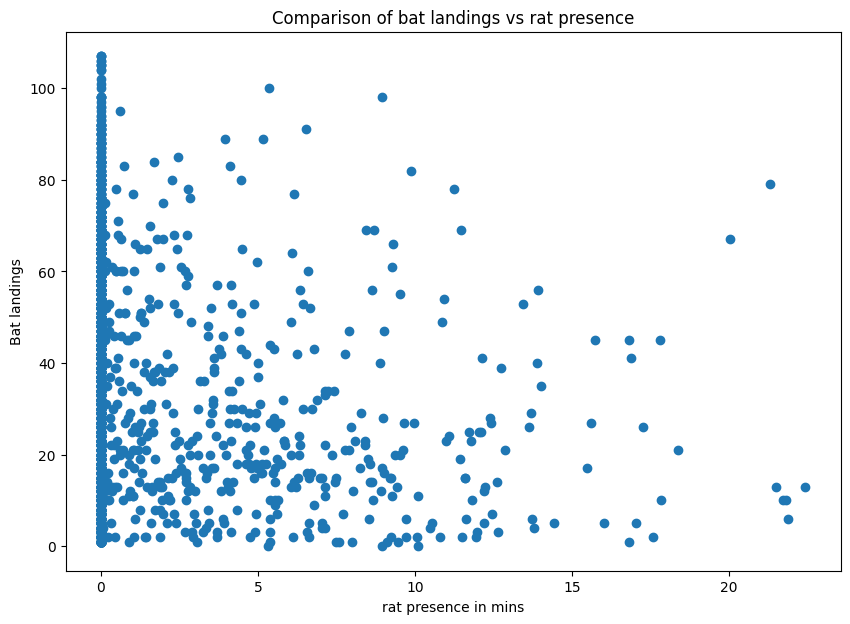

In [43]:
# Now, lets look at the presence of rats and the number of bat landings within a 30 min period in dataset2

rats_min=df2['rat_minutes']
number_bat=df2['bat_landing_number']
plt.figure(figsize=(10,7))
plt.scatter(rats_min,number_bat)
plt.xlabel("rat presence in mins")
plt.ylabel("Bat landings")
plt.title("Comparison of bat landings vs rat presence")
plt.show()


In [50]:
#Lets calculate correlation. we will calcualte pearson correlation
coeff,p=stats.pearsonr(rats_min,number_bat)
print("correlation coefficient :",round(coeff,3))
print("p-value :", round(p,3))


correlation coefficient : -0.099
p-value : 0.0


From above scatter plot and the correlation coefficient, we can see that there is negative correlation between bat landing and rat presence. As rat presence increases in duration, the number of bat landing gradually decreases.